# EDA and Data Prerocessing

This notebook provides an exploratory data analysis on the arXiv dataset. The collection process is available here in this notebook.

In [27]:
import pandas as pd 
import ast
import matplotlib.pyplot as plt 
import seaborn as sns 

from pathlib import Path

In [28]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aldir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aldir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aldir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [29]:
PATH_DATA_BASE = Path.cwd().parent / "data"

# Performing basic EDA (Explonatory Data Analysis)

In this section, we first load the dataset into a pandas.DataFrame and then perform some basic explonatory data analysis (EDA).

In [30]:
# Setting pandas option to display the full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

arxiv_data = pd.read_csv(PATH_DATA_BASE / 'data.csv')
arxiv_data.head()

,titles,abstracts,terms,urls
0,HisynSeg: Weakly-Supervised Histopathological Image Segmentation via Image-Mixing Synthesis and Consistency Regularization,"Tissue semantic segmentation is one of the key tasks in computational\npathology. To avoid the expensive and laborious acquisition of pixel-level\nannotations, a wide range of studies attempt to adopt the class activation map\n(CAM), a weakly-supervised learning scheme, to achieve pixel-level tissue\nsegmentation. However, CAM-based methods are prone to suffer from\nunder-activation and over-activation issues, leading to poor segmentation\nperformance. To address this problem, we propose a novel weakly-supervised\nsemantic segmentation framework for histopathological images based on\nimage-mixing synthesis and consistency regularization, dubbed HisynSeg.\nSpecifically, synthesized histopathological images with pixel-level masks are\ngenerated for fully-supervised model training, where two synthesis strategies\nare proposed based on Mosaic transformation and B\'ezier mask generation.\nBesides, an image filtering module is developed to guarantee the authenticity\nof the synthesized images. In order to further avoid the model overfitting to\nthe occasional synthesis artifacts, we additionally propose a novel\nself-supervised consistency regularization, which enables the real images\nwithout segmentation masks to supervise the training of the segmentation model.\nBy integrating the proposed techniques, the HisynSeg framework successfully\ntransforms the weakly-supervised semantic segmentation problem into a\nfully-supervised one, greatly improving the segmentation accuracy. Experimental\nresults on three datasets prove that the proposed method achieves a\nstate-of-the-art performance. Code is available at\nhttps://github.com/Vison307/HisynSeg.","['cs.CV', 'cs.AI']",http://arxiv.org/abs/2412.20924v1
1,Dual-Space Augmented Intrinsic-LoRA for Wind Turbine Segmentation,"Accurate segmentation of wind turbine blade (WTB) images is critical for\neffective assessments, as it directly influences the performance of automated\ndamage detection systems. Despite advancements in large universal vision\nmodels, these models often underperform in domain-specific tasks like WTB\nsegmentation. To address this, we extend Intrinsic LoRA for image segmentation,\nand propose a novel dual-space augmentation strategy that integrates both\nimage-level and latent-space augmentations. The image-space augmentation is\nachieved through linear interpolation between image pairs, while the\nlatent-space augmentation is accomplished by introducing a noise-based latent\nprobabilistic model. Our approach significantly boosts segmentation accuracy,\nsurpassing current state-of-the-art methods in WTB image segmentation.","['cs.CV', 'cs.AI', 'cs.LG']",http://arxiv.org/abs/2412.20838v1
2,Solar Filaments Detection using Active Contours Without Edges,"In this article, an active contours without edges (ACWE)-based algorithm has\nbeen proposed for the detection of solar filaments in H-alpha full-disk solar\nimages. The overall algorithm consists of three main steps of image processing.\nThese are image pre-processing, image segmentation, and image post-processing.\nHere in the work, contours are initialized on the solar image and allowed to\ndeform based on the energy function. As soon as the contour reaches the\nboundary of the desired object, the energy function gets reduced, and the\ncontour stops evolving. The proposed algorithm has been applied to few\nbenchmark datasets and has been compared with the classical technique of object\ndetection. The results analysis indicates that the proposed algorithm\noutperforms the results obtained using the existing classical algorithm of\nobject detection.","['cs.CV', 'astro-ph.IM', 'astro-ph.SR', 'cs.AI', 'cs.LG']",http://arxiv.org/abs/2412.20749v1
3,TAVP: Task-Adaptive Visual Prompt for Cross-domain Few-shot Segmentation,"While large visual models (LVM) demonstrated significan

In [31]:
print(f"There are {len(arxiv_data)} rows in the dataset.")

There are 83941 rows in the dataset.


Real-world data is noisy. One of the most commonly observed source of noise is data duplication. Here we notice that our initial dataset has got about 17k duplicate entries.

In [32]:
total_duplicate_titles = sum(arxiv_data['titles'].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 23377 duplicate titles.


Note that the 'terms' column is a string representation of a list. We are converting it to a list using the ast.literal_eval function.

In [33]:
arxiv_data['terms'] = arxiv_data['terms'].apply(ast.literal_eval)
arxiv_data.head()

,titles,abstracts,terms,urls
0,HisynSeg: Weakly-Supervised Histopathological Image Segmentation via Image-Mixing Synthesis and Consistency Regularization,"Tissue semantic segmentation is one of the key tasks in computational\npathology. To avoid the expensive and laborious acquisition of pixel-level\nannotations, a wide range of studies attempt to adopt the class activation map\n(CAM), a weakly-supervised learning scheme, to achieve pixel-level tissue\nsegmentation. However, CAM-based methods are prone to suffer from\nunder-activation and over-activation issues, leading to poor segmentation\nperformance. To address this problem, we propose a novel weakly-supervised\nsemantic segmentation framework for histopathological images based on\nimage-mixing synthesis and consistency regularization, dubbed HisynSeg.\nSpecifically, synthesized histopathological images with pixel-level masks are\ngenerated for fully-supervised model training, where two synthesis strategies\nare proposed based on Mosaic transformation and B\'ezier mask generation.\nBesides, an image filtering module is developed to guarantee the authenticity\nof the synthesized images. In order to further avoid the model overfitting to\nthe occasional synthesis artifacts, we additionally propose a novel\nself-supervised consistency regularization, which enables the real images\nwithout segmentation masks to supervise the training of the segmentation model.\nBy integrating the proposed techniques, the HisynSeg framework successfully\ntransforms the weakly-supervised semantic segmentation problem into a\nfully-supervised one, greatly improving the segmentation accuracy. Experimental\nresults on three datasets prove that the proposed method achieves a\nstate-of-the-art performance. Code is available at\nhttps://github.com/Vison307/HisynSeg.","[cs.CV, cs.AI]",http://arxiv.org/abs/2412.20924v1
1,Dual-Space Augmented Intrinsic-LoRA for Wind Turbine Segmentation,"Accurate segmentation of wind turbine blade (WTB) images is critical for\neffective assessments, as it directly influences the performance of automated\ndamage detection systems. Despite advancements in large universal vision\nmodels, these models often underperform in domain-specific tasks like WTB\nsegmentation. To address this, we extend Intrinsic LoRA for image segmentation,\nand propose a novel dual-space augmentation strategy that integrates both\nimage-level and latent-space augmentations. The image-space augmentation is\nachieved through linear interpolation between image pairs, while the\nlatent-space augmentation is accomplished by introducing a noise-based latent\nprobabilistic model. Our approach significantly boosts segmentation accuracy,\nsurpassing current state-of-the-art methods in WTB image segmentation.","[cs.CV, cs.AI, cs.LG]",http://arxiv.org/abs/2412.20838v1
2,Solar Filaments Detection using Active Contours Without Edges,"In this article, an active contours without edges (ACWE)-based algorithm has\nbeen proposed for the detection of solar filaments in H-alpha full-disk solar\nimages. The overall algorithm consists of three main steps of image processing.\nThese are image pre-processing, image segmentation, and image post-processing.\nHere in the work, contours are initialized on the solar image and allowed to\ndeform based on the energy function. As soon as the contour reaches the\nboundary of the desired object, the energy function gets reduced, and the\ncontour stops evolving. The proposed algorithm has been applied to few\nbenchmark datasets and has been compared with the classical technique of object\ndetection. The results analysis indicates that the proposed algorithm\noutperforms the results obtained using the existing classical algorithm of\nobject detection.","[cs.CV, astro-ph.IM, astro-ph.SR, cs.AI, cs.LG]",http://arxiv.org/abs/2412.20749v1
3,TAVP: Task-Adaptive Visual Prompt for Cross-domain Few-shot Segmentation,"While large visual models (LVM) demonstrated significant potential in image

## Distribution of Terms

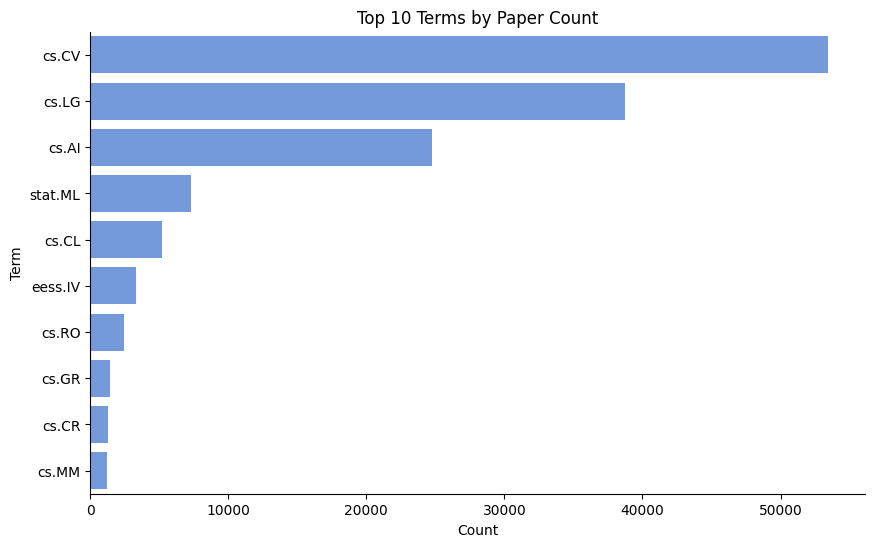

In [34]:
# Get all terms
all_terms = [term for sublist in arxiv_data['terms'].tolist() for term in sublist]

# Count terms
terms_count = Counter(all_terms)

# Create dataframe
df_terms = pd.DataFrame.from_dict(terms_count, orient='index').reset_index()
df_terms.columns = ['Term', 'Count']

# Sort by count and take the top 10
df_terms_top10 = df_terms.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Term', data=df_terms_top10, color='cornflowerblue')

# Remove top and right spines
sns.despine()

plt.title('Top 10 Terms by Paper Count')
plt.show()

## Word Cloud of Titles

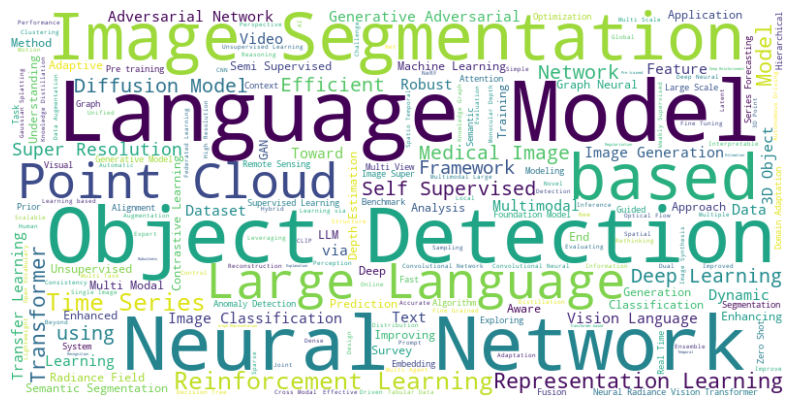

In [35]:
from wordcloud import WordCloud

# Concatenate all titles
all_titles = ' '.join(arxiv_data['titles'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_titles)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Before proceeding further, we drop these entries

In [36]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")

There are 60564 rows in the deduplicated dataset.


In [37]:
arxiv_data.to_csv(PATH_DATA_BASE / 'filtered_data.csv', index=False)

# Approaches

We will be testing two approaches to recommend papers to a user:

* The first approach is a content-based approach, where we will be recommending papers based on the similarity of their titles.
* The second approach is also a content-based approach but we will be recommending papers based on the similarity of their abstracts.

## Content-based approach using titles

Let's us start by exploring the first approach.

Since we are using the titles of the papers to recommended similar papers, we can drop the other columns.

In [38]:
titles_dataset = arxiv_data.drop(columns=['abstracts'])

In [39]:
titles_dataset.head()

,titles,terms,urls
0,HisynSeg: Weakly-Supervised Histopathological Image Segmentation via Image-Mixing Synthesis and Consistency Regularization,"[cs.CV, cs.AI]",http://arxiv.org/abs/2412.20924v1
1,Dual-Space Augmented Intrinsic-LoRA for Wind Turbine Segmentation,"[cs.CV, cs.AI, cs.LG]",http://arxiv.org/abs/2412.20838v1
2,Solar Filaments Detection using Active Contours Without Edges,"[cs.CV, astro-ph.IM, astro-ph.SR, cs.AI, cs.LG]",http://arxiv.org/abs/2412.20749v1
3,TAVP: Task-Adaptive Visual Prompt for Cross-domain Few-shot Segmentation,[cs.CV],http://arxiv.org/abs/2409.05393v2
4,Gradient Alignment Improves Test-Time Adaptation for Medical Image Segmentation,[cs.CV],http://arxiv.org/abs/2408.07343v4


In [40]:
average_title_length = int(titles_dataset['titles'].apply(len).mean())
print(f"The average text length of a title is {average_title_length} characters.")

The average text length of a title is 77 characters.


In [41]:
# Calculate the length of each title
titles_dataset['title_length'] = titles_dataset['titles'].apply(len)

In [42]:
# Calculate the min and max length
min_length = titles_dataset['title_length'].min()
max_length = titles_dataset['title_length'].max()

print('The minimum length of a title:', min_length)
print('The maximum length of a title: ', max_length)

The minimum length of a title: 7
The maximum length of a title:  235
 7
The maximum length of a title:  235


In [43]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame. 
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """
    
    # Compute the lengths of all titles
    title_lengths = df[column_name].apply(len)
    
    # Calculate mean and standard deviation
    mean_length = title_lengths.mean()
    std_length = title_lengths.std()
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(title_lengths, bins=50, color='b', alpha=.2)
    
    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray', linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='blue', linestyle='--', linewidth=1)
    
    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()[1]*.9, f"Mean: {mean_length:.2f}", fontsize=10)
    plt.title(f"Distribution of {column_name.capitalize()} Lengths")
    plt.xlabel(f"{column_name.capitalize()} Length")
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [44]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens 
    and stop words, counts the frequency of each word, and then plots the 10 most common words 
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """
    
    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(10,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')
    
    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

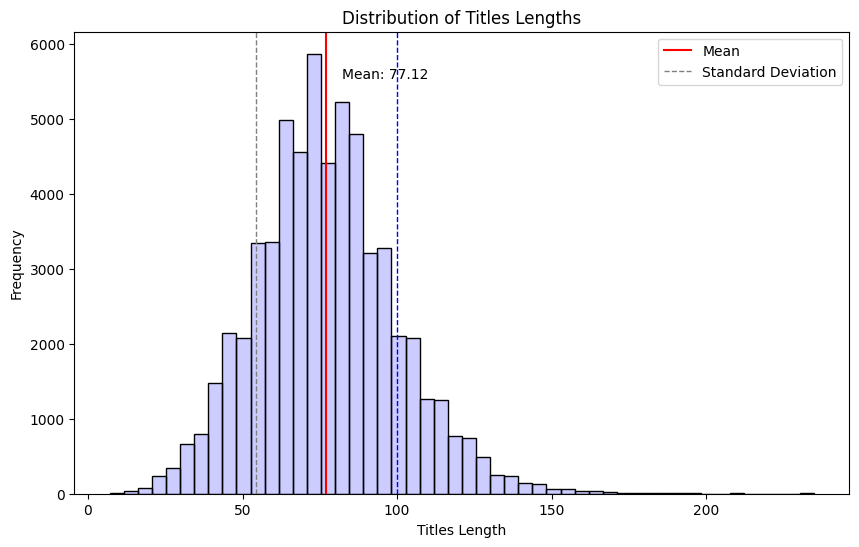

In [45]:
plot_length_distribution(titles_dataset, 'titles')

C:\Users\aldir\AppData\Local\Temp\ipykernel_1924\2528212924.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')


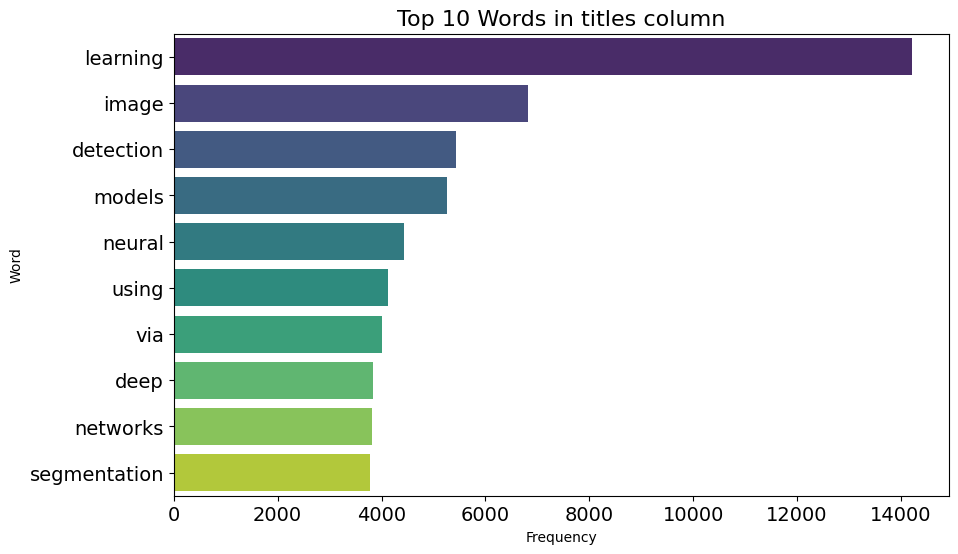

In [46]:
plot_top_words(titles_dataset, 'titles')

### Content-based approach using abstracts

Let's us now explore thhe second approach.

We will be dropping the title column and keeping the abstract column.

In [47]:
abstracts_dataset = arxiv_data.drop(columns=['titles'])

In [48]:
abstracts_dataset.head()

,abstracts,terms,urls
0,"Tissue semantic segmentation is one of the key tasks in computational\npathology. To avoid the expensive and laborious acquisition of pixel-level\nannotations, a wide range of studies attempt to adopt the class activation map\n(CAM), a weakly-supervised learning scheme, to achieve pixel-level tissue\nsegmentation. However, CAM-based methods are prone to suffer from\nunder-activation and over-activation issues, leading to poor segmentation\nperformance. To address this problem, we propose a novel weakly-supervised\nsemantic segmentation framework for histopathological images based on\nimage-mixing synthesis and consistency regularization, dubbed HisynSeg.\nSpecifically, synthesized histopathological images with pixel-level masks are\ngenerated for fully-supervised model training, where two synthesis strategies\nare proposed based on Mosaic transformation and B\'ezier mask generation.\nBesides, an image filtering module is developed to guarantee the authenticity\nof the synthesized images. In order to further avoid the model overfitting to\nthe occasional synthesis artifacts, we additionally propose a novel\nself-supervised consistency regularization, which enables the real images\nwithout segmentation masks to supervise the training of the segmentation model.\nBy integrating the proposed techniques, the HisynSeg framework successfully\ntransforms the weakly-supervised semantic segmentation problem into a\nfully-supervised one, greatly improving the segmentation accuracy. Experimental\nresults on three datasets prove that the proposed method achieves a\nstate-of-the-art performance. Code is available at\nhttps://github.com/Vison307/HisynSeg.","[cs.CV, cs.AI]",http://arxiv.org/abs/2412.20924v1
1,"Accurate segmentation of wind turbine blade (WTB) images is critical for\neffective assessments, as it directly influences the performance of automated\ndamage detection systems. Despite advancements in large universal vision\nmodels, these models often underperform in domain-specific tasks like WTB\nsegmentation. To address this, we extend Intrinsic LoRA for image segmentation,\nand propose a novel dual-space augmentation strategy that integrates both\nimage-level and latent-space augmentations. The image-space augmentation is\nachieved through linear interpolation between image pairs, while the\nlatent-space augmentation is accomplished by introducing a noise-based latent\nprobabilistic model. Our approach significantly boosts segmentation accuracy,\nsurpassing current state-of-the-art methods in WTB image segmentation.","[cs.CV, cs.AI, cs.LG]",http://arxiv.org/abs/2412.20838v1
2,"In this article, an active contours without edges (ACWE)-based algorithm has\nbeen proposed for the detection of solar filaments in H-alpha full-disk solar\nimages. The overall algorithm consists of three main steps of image processing.\nThese are image pre-processing, image segmentation, and image post-processing.\nHere in the work, contours are initialized on the solar image and allowed to\ndeform based on the energy function. As soon as the contour reaches the\nboundary of the desired object, the energy function gets reduced, and the\ncontour stops evolving. The proposed algorithm has been applied to few\nbenchmark datasets and has been compared with the classical technique of object\ndetection. The results analysis indicates that the proposed algorithm\noutperforms the results obtained using the existing classical algorithm of\nobject detection.","[cs.CV, astro-ph.IM, astro-ph.SR, cs.AI, cs.LG]",http://arxiv.org/abs/2412.20749v1
3,"While large visual models (LVM) demonstrated significant potential in image\nunderstanding, due to the application of large-scale pre-training, the Segment\nAnything Model (SAM) has also achieved great success in the field of image\nsegmentation, supporting flexible interactive cues and strong learning\ncapabilities. However, SAM's performance often falls short in cross-domain and\nfew-shot applications

In [49]:
average_abstract_length = int(abstracts_dataset['abstracts'].apply(len).mean())
print(f'The average text length of an abstarct is {average_abstract_length} characters.')

The average text length of an abstarct is 1295 characters.


In [50]:
# Calculate the length of each abstract
abstracts_dataset['abstract_length'] = abstracts_dataset['abstracts'].apply(len)

In [51]:
# Calculatee the min and max length
min_length = abstracts_dataset['abstract_length'].min()
max_length = abstracts_dataset['abstract_length'].max()

print('The minimum abstract length is', min_length)
print('The maximum abstract length is', max_length)

The minimum abstract length is 96
The maximum abstract length is 3403


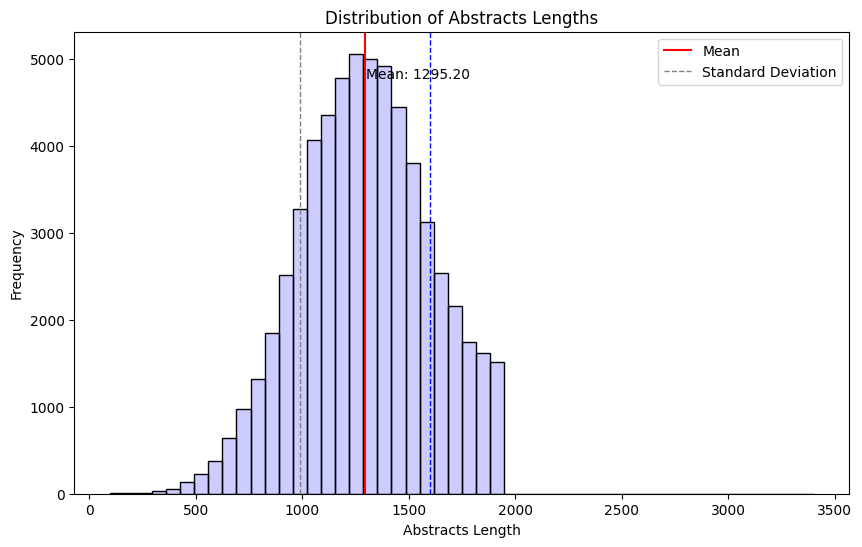

In [52]:
plot_length_distribution(abstracts_dataset, 'abstracts')

C:\Users\aldir\AppData\Local\Temp\ipykernel_1924\2528212924.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')


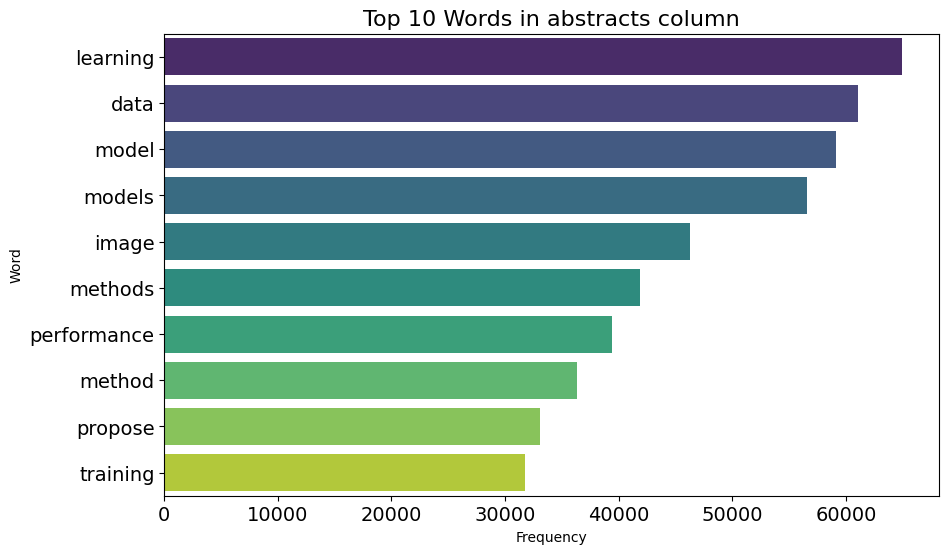

In [53]:
plot_top_words(abstracts_dataset, 'abstracts')

# Observations


The average text length of an abstract is 1237 characters, and its maximum length is 2790 characters. So the best choice is to use a sentence-transformer model with a Max Sequence Length capability of over 2790 characters.

Unfortunately, most pre-trained models have a Max Sequence Length of 512. The transformer model just won't be able to process the entire abstract at once due to its max length constraint, so it processes as much as it can, which in this case is the first 512 words.

A naive approach would be to split the document into chunks, encode each chunk separately and then combine these encodings for a final document-level representation. For example, split a document into sentences, encode each sentence independently and then combine these sentence vectors (e.g., averaging, max-pooling, etc.) for a document representation.

Another approach would be to use a "sliding window". Instead of just taking the first 512 words, I could apply a "sliding window" approach where I first process the first 512 words, then the next 512 words (perhaps with some overlap), and so on until I've processed the whole abstract.